In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn import tree

In [ ]:
##True Positives (TP): The cases in which the model predicted the positive class correctly.
##True Negatives (TN): The cases in which the model predicted the negative class correctly.
##False Positives (FP): Also known as Type I error, these are the cases where the model predicted the class as positive, but it was actually negative.
##False Negatives (FN): Also known as Type II error, these are the cases where the model predicted the class as negative, but it was actually positive.


In [2]:
df= pd.read_csv("/content/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
x= df.drop(['Outcome'],axis=1)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [4]:
y= df['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [6]:
clf= tree.DecisionTreeClassifier()


In [7]:
clf_train= clf.fit(x,y)
clf_train

DecisionTreeClassifier()

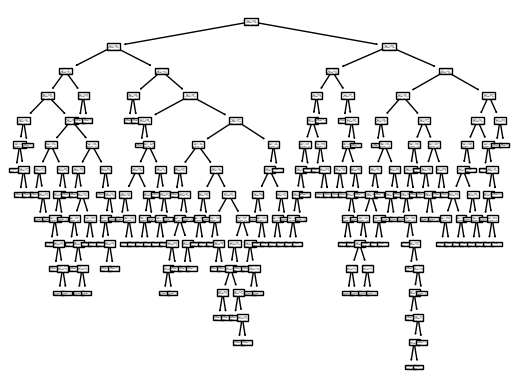

In [8]:
tree.plot_tree(clf_train)
plt.show()

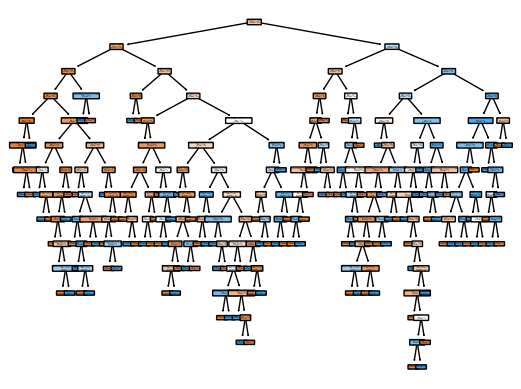

In [9]:
tree.plot_tree(clf_train, feature_names=list(x.columns.values),rounded=True, filled= True)
plt.show()

In [10]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3,random_state=42)


In [11]:
clf= clf.fit(x_train, y_train)

In [12]:
y_pred= clf.predict(x_test)
y_pred

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [13]:
confusion_matrix(y_test, y_pred)

array([[110,  41],
       [ 29,  51]])

In [14]:
accuracy_score(y_test,y_pred)

0.696969696969697

In [15]:
precision= precision_score(y_test, y_pred, average= None)
precision

array([0.79136691, 0.55434783])

In [16]:
recall= recall_score(y_test,y_pred, average= None)
recall

array([0.72847682, 0.6375    ])

In [17]:
F1_score= 2*(precision * recall)/ (precision + recall)
F1_score

array([0.75862069, 0.59302326])